In [9]:
%reload_ext autoreload
%autoreload 2

from fastai.vision import *
import os
print('imports loaded')

imports loaded


## Check to see if there is a CUDA device

In [2]:
try:
    print(torch.cuda.get_device_name(0))
except:
    print("no CUDA device detected")

no CUDA device detected


## The following creates a DataBunch Object 
In this case I'm using a sample from dogs-cats for setting up the parameters for the AI

In [3]:
path = "../training/dogs-cats/"
size = 224
bs = 32

labels = os.listdir(path)
print("No. of labels: {}".format(len(labels)))
print("-----------------")
for label in labels:
    print("{}, {} files".format(label, len(os.listdir(path+label))))

No. of labels: 3
-----------------
models, 1 files
dogs, 20 files
cats, 20 files



 Data to be run:
-----------------


['cats', 'dogs']

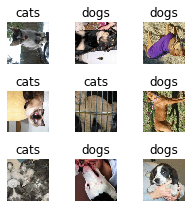

In [4]:
data = ImageDataBunch.from_folder(path, 
    ds_tfms=get_transforms(do_flip=True, flip_vert=True),
    valid_pct=0.2, 
    size=size, 
    bs=bs)

print("\n Data to be run:")
print("-----------------")
data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(3,3))
data.classes

## The Following will train and interpret a model using resnet34
Currently in this test I am using the resnet34 model (which I would like to use for my project)
The learner will run for 5 cycles, and then print a confusion matrix of the validation data.

epoch,train_loss,valid_loss,accuracy,time
0,1.510404,5.833753,0.250000,00:06
1,1.246210,0.989122,0.625000,00:06
2,0.888251,0.344740,0.750000,00:06
3,0.665408,0.246534,0.875000,00:06
4,0.526967,0.262688,0.875000,00:06


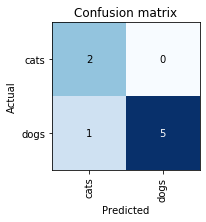

In [7]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy])
learner.fit_one_cycle(5,max_lr=1e-2)

interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(3,3))